In [52]:
# basics
import numpy as np
import numexpr
import pandas as pd
import time
from datetime import datetime, date, timedelta
from dateutil import parser, tz
import re
import os
import sys
import pickle

from tqdm.notebook import trange, tqdm


#Math & ML
import sklearn.metrics
import math

# seaborn
import matplotlib
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import plotly.express as px
import os 
sys.path.append("../")
import utils
from causalimpact import CausalImpact


In [53]:
mov_txt="movement-range-2020-09-21.txt"

In [54]:
os.getcwd()

'/Users/mk707t/repo_per/Covid19_fb/Notebooks'

In [55]:
abs_path = os.getcwd()
move_path = '../Data/movement-range-data-2020-09-20/' # rel_path shouldn't start with slash. Otherwise will get recognized as abspath in os.path.join 

In [56]:
print(os.path.join(abs_path,move_path,mov_txt))

/Users/mk707t/repo_per/Covid19_fb/Notebooks/../Data/movement-range-data-2020-09-20/movement-range-2020-09-21.txt


# Is migration data capturing the signal of the population movement?

## EDA & Data preparation

### 1. Load migration data

In [57]:
df_mov = pd.read_table(os.path.join(abs_path,move_path, mov_txt))

/Users/mk707t/anaconda3/envs/symp/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3214: DtypeWarning:

Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.



In [58]:
df_mov.head()

ds country polygon_source   polygon_id polygon_name  \
0  2020-03-01     AGO           GADM  AGO.10.10_1      Lubango   
1  2020-03-02     AGO           GADM  AGO.10.10_1      Lubango   
2  2020-03-03     AGO           GADM  AGO.10.10_1      Lubango   
3  2020-03-04     AGO           GADM  AGO.10.10_1      Lubango   
4  2020-03-05     AGO           GADM  AGO.10.10_1      Lubango   

   all_day_bing_tiles_visited_relative_change  \
0                                    -0.02992   
1                                     0.06746   
2                                     0.05873   
3                                     0.01288   
4                                     0.02753   

   all_day_ratio_single_tile_users  baseline_name baseline_type  
0                          0.18751  full_february   DAY_OF_WEEK  
1                          0.10521  full_february   DAY_OF_WEEK  
2                          0.11397  full_february   DAY_OF_WEEK  
3                          0.10492  full_february   DAY_OF_WEEK  
4                          0.11056  full_february   DAY_OF_WEEK

In [59]:
# Facebook has compiled the mobility data from March and onward: in two metrics: movement change and stay put index
# More can be found here: https://research.fb.com/blog/2020/06/protecting-privacy-in-facebook-mobility-data-during-the-covid-19-response/

In [60]:
# US and Californait Specific 

In [61]:
df_mov['ds']=  pd.to_datetime(df_mov['ds'])
df_mov[df_mov.country=='USA']

ds country polygon_source polygon_id polygon_name  \
2766088 2020-03-01     USA           FIPS      01001      Autauga   
2766089 2020-03-02     USA           FIPS      01001      Autauga   
2766090 2020-03-03     USA           FIPS      01001      Autauga   
2766091 2020-03-04     USA           FIPS      01001      Autauga   
2766092 2020-03-05     USA           FIPS      01001      Autauga   
...            ...     ...            ...        ...          ...   
3292235 2020-09-17     USA           FIPS      78030   St. Thomas   
3292236 2020-09-18     USA           FIPS      78030   St. Thomas   
3292237 2020-09-19     USA           FIPS      78030   St. Thomas   
3292238 2020-09-20     USA           FIPS      78030   St. Thomas   
3292239 2020-09-21     USA           FIPS      78030   St. Thomas   

         all_day_bing_tiles_visited_relative_change  \
2766088                                     0.04845   
2766089                                     0.03275   
2766090                                     0.05122   
2766091                                    -0.04741   
2766092                                     0.06285   
...                                             ...   
3292235                                    -0.13662   
3292236                                    -0.11021   
3292237                                    -0.13284   
3292238                                    -0.21480   
3292239                                    -0.20372   

         all_day_ratio_single_tile_users                        baseline_name  \
2766088                          0.18910  full_february_except_presidents_day   
2766089                          0.15003  full_february_except_presidents_day   
2766090                          0.14391  full_february_except_presidents_day   
2766091                          0.16058  full_february_except_presidents_day   
2766092                          0.15298  full_february_except_presidents_day   
...                                  ...                                  ...   
3292235                          0.18709  full_february_except_presidents_day   
3292236                          0.16729  full_february_except_presidents_day   
3292237                          0.20135  full_february_except_presidents_day   
3292238                          0.24562  full_february_except_presidents_day   
3292239                          0.16859  full_february_except_presidents_day   

        baseline_type  
2766088   DAY_OF_WEEK  
2766089   DAY_OF_WEEK  
2766090   DAY_OF_WEEK  
2766091   DAY_OF_WEEK  
2766092   DAY_OF_WEEK  
...               ...  
3292235   DAY_OF_WEEK  
3292236   DAY_OF_WEEK  
3292237   DAY_OF_WEEK  
3292238   DAY_OF_WEEK  
3292239   DAY_OF_WEEK  

[526152 rows x 9 columns]

In [62]:
# Data seems to be in County level - Let's merge it with the FIPS code from US Census Bereau 

### 2. Load cou nty level geographical data

In [63]:
# First attempt 

In [64]:
# https://www.census.gov/geographies/reference-files/2018/demo/popest/2018-fips.html

In [65]:
FIPS_path="../Data/ETC"
FIPS_exl ="all-geocodes-v2018.xlsx"

In [66]:
df_FIPS= pd.read_excel(os.path.join(abs_path,FIPS_path,FIPS_exl),header=4,dtype=str)

In [67]:
df_FIPS.head()

Summary Level State Code (FIPS) County Code (FIPS)  \
0           010                00                000   
1           040                01                000   
2           050                01                001   
3           050                01                003   
4           050                01                005   

  County Subdivision Code (FIPS) Place Code (FIPS)  \
0                          00000             00000   
1                          00000             00000   
2                          00000             00000   
3                          00000             00000   
4                          00000             00000   

  Consolidtated City Code (FIPS)  \
0                          00000   
1                          00000   
2                          00000   
3                          00000   
4                          00000   

  Area Name (including legal/statistical area description)  
0                                      United States        
1                                            Alabama        
2                                     Autauga County        
3                                     Baldwin County        
4                                     Barbour County

In [68]:
# this data seems to have issue 

In [69]:
# Attempt 2: https://www.dol.gov/owcp/regs/feeschedule/fee/Effective_May_16_2004_County_and_State_FIPS.htm

In [70]:
FIPS_exl ="FIPS.xlsx"
df_FIPS= pd.read_excel(os.path.join(abs_path,FIPS_path,FIPS_exl),dtype=str)
df_FIPS.head()

FIPS NECMA  ST     COUNTY/TOWN
0  01001  5240  AL  Autauga County
1  01003  5160  AL  Baldwin County
2  01005     0  AL  Barbour County
3  01007     0  AL     Bibb County
4  01009  1000  AL   Blount County

### 3. Zooming into California and wildfire affected regions 

In [71]:
df_FIPS[df_FIPS.ST=="CA"]

FIPS NECMA  ST             COUNTY/TOWN
185  06001  5775  CA          Alameda County
186  06003     0  CA           Alpine County
187  06005     0  CA           Amador County
188  06007  1620  CA            Butte County
189  06009     0  CA        Calaveras County
190  06011     0  CA           Colusa County
191  06013  5775  CA     Contra Costa County
192  06015     0  CA        Del Norte County
193  06017  6920  CA        El Dorado County
194  06019  2840  CA           Fresno County
195  06021     0  CA            Glenn County
196  06023     0  CA         Humboldt County
197  06025     0  CA         Imperial County
198  06027     0  CA             Inyo County
199  06029  0680  CA             Kern County
200  06031     0  CA            Kings County
201  06033     0  CA             Lake County
202  06035     0  CA           Lassen County
203  06037  4480  CA      Los Angeles County
204  06039  2840  CA           Madera County
205  06041  7360  CA            Marin County
206  06043     0  CA         Mariposa County
207  06045     0  CA        Mendocino County
208  06047  4940  CA           Merced County
209  06049     0  CA            Modoc County
210  06051     0  CA             Mono County
211  06053  7120  CA         Monterey County
212  06055  8720  CA             Napa County
213  06057     0  CA           Nevada County
214  06059  5945  CA           Orange County
215  06061  6920  CA           Placer County
216  06063     0  CA           Plumas County
217  06065  6780  CA        Riverside County
218  06067  6920  CA       Sacramento County
219  06069     0  CA       San Benito County
220  06071  6780  CA   San Bernardino County
221  06073  7320  CA        San Diego County
222  06075  7360  CA    San Francisco County
223  06077  8120  CA      San Joaquin County
224  06079  7460  CA  San Luis Obispo County
225  06081  7360  CA        San Mateo County
226  06083  7480  CA    Santa Barbara County
227  06085  7400  CA      Santa Clara County
228  06087  7485  CA       Santa Cruz County
229  06089  6690  CA           Shasta County
230  06091     0  CA           Sierra County
231  06093     0  CA         Siskiyou County
232  06095  8720  CA           Solano County
233  06097  7500  CA           Sonoma County
234  06099  5170  CA       Stanislaus County
235  06101  9340  CA           Sutter County
236  06103     0  CA           Tehama County
237  06105     0  CA          Trinity County
238  06107  8780  CA           Tulare County
239  06109     0  CA         Tuolumne County
240  06111  8735  CA          Ventura County
241  06113  9270  CA             Yolo County
242  06115  9340  CA             Yuba County

In [72]:
df_mov_ = df_mov.merge(df_FIPS, how="left", left_on="polygon_id", right_on="FIPS" ).drop(columns=["polygon_source","polygon_id","baseline_name","baseline_type"])

In [73]:
df_mov_cal = df_mov_[df_mov_.ST =="CA"]

In [74]:
df_mov_cal

ds country polygon_name  \
2797632 2020-03-01     USA      Alameda   
2797633 2020-03-02     USA      Alameda   
2797634 2020-03-03     USA      Alameda   
2797635 2020-03-04     USA      Alameda   
2797636 2020-03-05     USA      Alameda   
...            ...     ...          ...   
2808893 2020-09-17     USA         Yuba   
2808894 2020-09-18     USA         Yuba   
2808895 2020-09-19     USA         Yuba   
2808896 2020-09-20     USA         Yuba   
2808897 2020-09-21     USA         Yuba   

         all_day_bing_tiles_visited_relative_change  \
2797632                                    -0.03427   
2797633                                     0.00809   
2797634                                     0.02790   
2797635                                     0.00709   
2797636                                    -0.01875   
...                                             ...   
2808893                                    -0.14612   
2808894                                    -0.13744   
2808895                                    -0.07286   
2808896                                    -0.08517   
2808897                                    -0.13983   

         all_day_ratio_single_tile_users   FIPS NECMA  ST     COUNTY/TOWN  
2797632                          0.17180  06001  5775  CA  Alameda County  
2797633                          0.11710  06001  5775  CA  Alameda County  
2797634                          0.10671  06001  5775  CA  Alameda County  
2797635                          0.11393  06001  5775  CA  Alameda County  
2797636                          0.11610  06001  5775  CA  Alameda County  
...                                  ...    ...   ...  ..             ...  
2808893                          0.21364  06115  9340  CA     Yuba County  
2808894                          0.20086  06115  9340  CA     Yuba County  
2808895                          0.22292  06115  9340  CA     Yuba County  
2808896                          0.26023  06115  9340  CA     Yuba County  
2808897                          0.21911  06115  9340  CA     Yuba County  

[11266 rows x 9 columns]

In [75]:
# Let's take a look at the Plumas county for example and how mobility changes 

<AxesSubplot:xlabel='ds'>

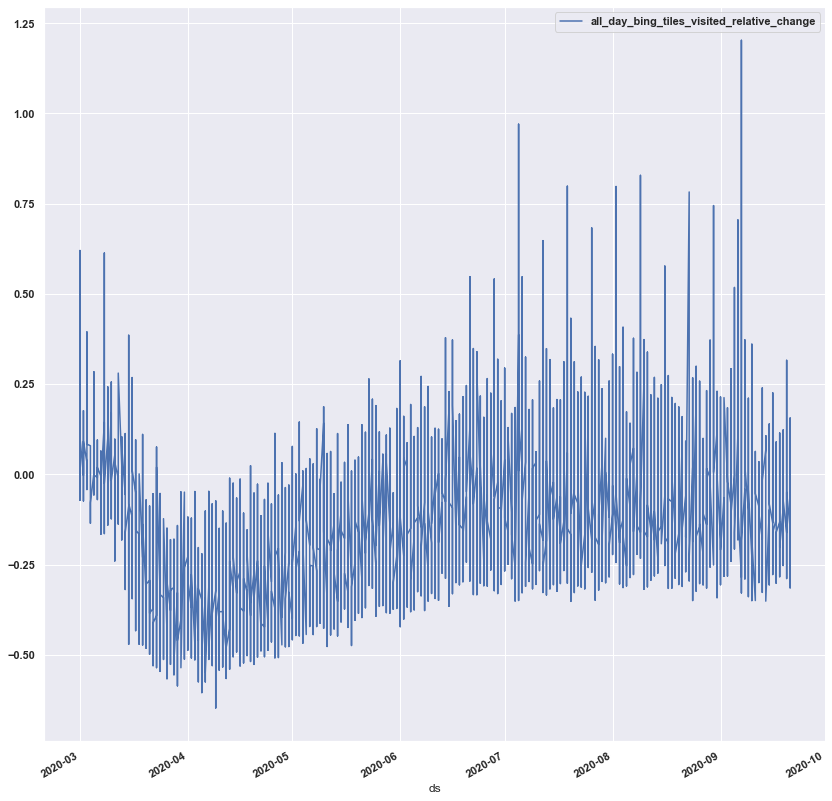

In [76]:
pd.options.plotting.backend = "matplotlib"
df_mov_cal.plot(x='ds', y='all_day_bing_tiles_visited_relative_change', figsize=(14,15))

In [77]:
pd.date_range(start=df_mov_cal.ds.min( ), end=df_mov_cal.ds.max( ), freq='d' )

DatetimeIndex(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10',
               ...
               '2020-09-12', '2020-09-13', '2020-09-14', '2020-09-15',
               '2020-09-16', '2020-09-17', '2020-09-18', '2020-09-19',
               '2020-09-20', '2020-09-21'],
              dtype='datetime64[ns]', length=205, freq='D')

<AxesSubplot:xlabel='ds'>

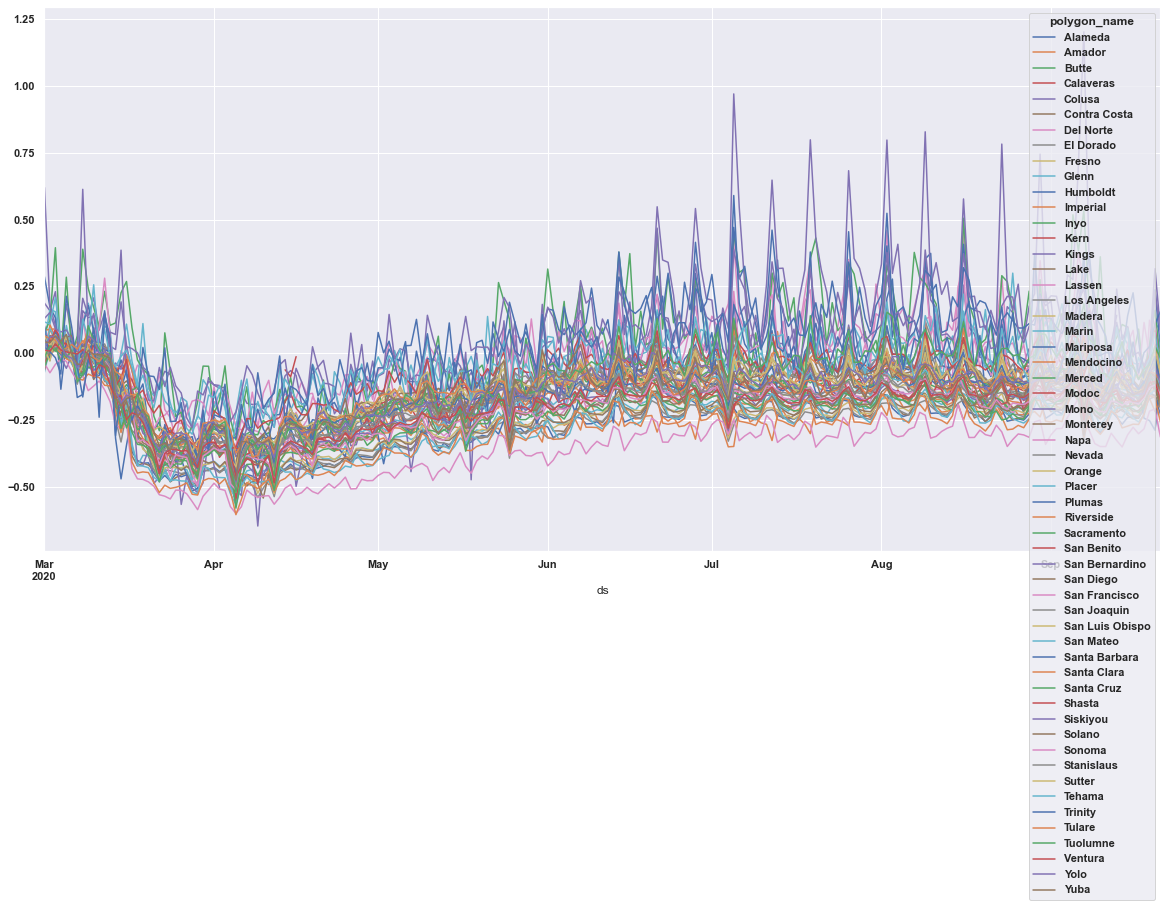

In [78]:
pd.options.plotting.backend = "matplotlib"
df_mov_cal.pivot(index="ds",columns= "polygon_name",values="all_day_bing_tiles_visited_relative_change").plot(figsize=(20,10))

<AxesSubplot:xlabel='ds'>

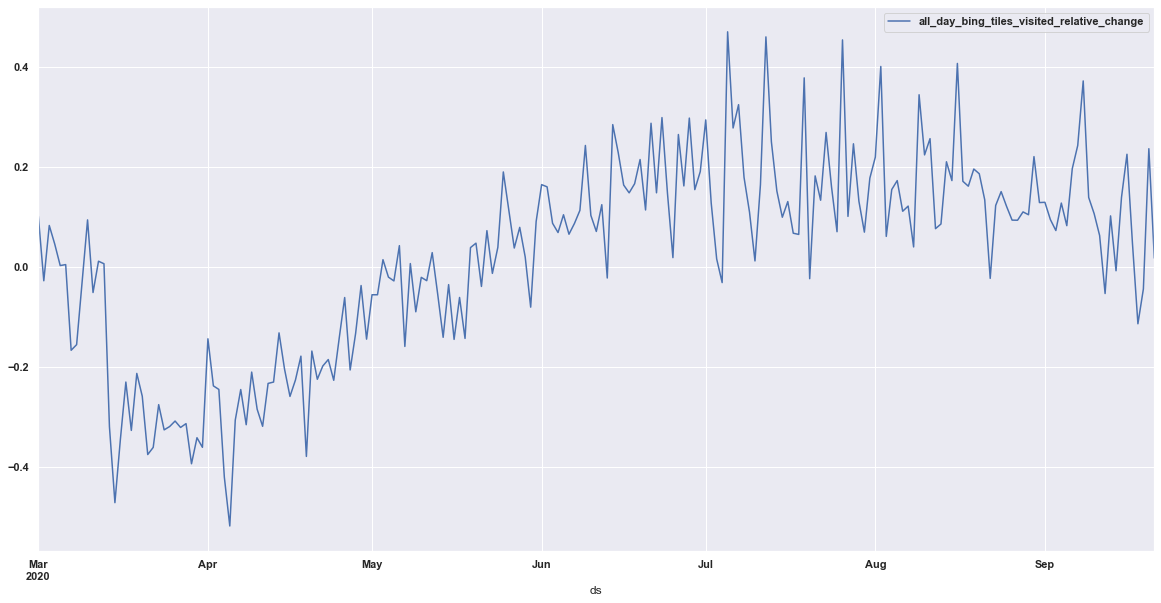

In [79]:
pd.options.plotting.backend = "matplotlib"
df_mov_cal[df_mov_cal['polygon_name']=='Plumas'].plot(x="ds", y ="all_day_bing_tiles_visited_relative_change",figsize=(20,10))

### 4. Mapping to counties affected (and unaffected) by the recent wild fire

In [80]:
# Tomorrow morning: TODO2: Analyze the movement or stay put change due to the COVID 19 based on the set of counter factuals  - Does it have any signal here?
# Tomorrow night: TODO3: Resource allocation to shelter places: https://github.com/datapartnership/covid19/blob/master/accessibility-Spain.ipynb
# Thursday morning: TODO3: Resource allocation to shelter places: https://github.com/datapartnership/covid19/blob/master/accessibility-Spain.ipynb
# Thursday night: TODO3: Resource allocation to shelter places: https://github.com/datapartnership/covid19/blob/master/accessibility-Spain.ipynb
# Friday morning: Inferring the population that have already been infected in the area; 

In [81]:
# So far, these counties are identified as mandated with the evacuation orders
# Plumas
# Fresno
# San Bernardino
# Siskiyou
# Los Angeles

In [82]:
evac=["Plumas","Fresno","San Bernardino","Siskiyou","Los Angeles"]

In [83]:
WF_path="../Data/ETC"
WF_exl ="mapdataall.csv"

In [84]:
df_wf= pd.read_csv(os.path.join(abs_path,WF_path,WF_exl))

In [85]:
display(df_wf.head())
display(df_wf.info())

incident_name  incident_is_final incident_date_last_update  \
0    Bridge Fire               True       2018-01-09 13:46:00   
1      Pala Fire               True       2020-09-16 14:07:35   
2     River Fire               True       2013-02-28 20:00:00   
3  Fawnskin Fire               True       2013-04-22 09:00:00   
4      Gold Fire               True       2013-05-01 07:00:00   

  incident_date_created          incident_administrative_unit  \
0   2017-10-31 11:22:00       Shasta-Trinity National Forest    
1   2009-05-24 14:56:00               CAL FIRE San Diego Unit   
2   2013-02-24 08:16:00          CAL FIRE San Bernardino Unit   
3   2013-04-20 17:30:00        San Bernardino National Forest   
4   2013-04-30 12:59:00  CAL FIRE Madera-Mariposa-Merced Unit   

   incident_administrative_unit_url incident_county  \
0                               NaN          Shasta   
1                               NaN       San Diego   
2                               NaN            Inyo   
3                               NaN  San Bernardino   
4                               NaN          Madera   

                                   incident_location  incident_acres_burned  \
0  I-5 and Turntable Bay, 7 miles NE of Shasta Lake                      37   
1        Hwy 76 and Pala Temecula, northwest of Pala                    122   
2  south of Narrow Gauge Rd & north of Hwy 136, e...                    406   
3  west of Delamar Mountain, north of the communi...                     30   
4  Between Road 210 and Road 200 near Fine Gold C...                    274   

   incident_containment  ... incident_latitude incident_type  \
0                   100  ...         40.774000           NaN   
1                   100  ...          1.000000      Wildfire   
2                   100  ...         36.602575           NaN   
3                   100  ...         34.288877           NaN   
4                   100  ...         37.116295           NaN   

                            incident_id  \
0  2ca11d45-8139-4c16-8af0-880d99b21e82   
1  8f61f461-552d-4538-b186-35ab030da416   
2  094719ba-a47b-4abb-9ec5-a506b2b9fd23   
3  58f89ff8-bd3e-4355-b1c0-8fa05c747d3f   
4  357ffc13-bef9-48eb-810f-c5de851972eb   

                                        incident_url  \
0  https://www.fire.ca.gov/incidents/2017/10/31/b...   
1  https://www.fire.ca.gov/incidents/2009/5/24/pa...   
2  https://www.fire.ca.gov/incidents/2013/2/24/ri...   
3  https://www.fire.ca.gov/incidents/2013/4/20/fa...   
4  https://www.fire.ca.gov/incidents/2013/4/30/go...   

  incident_date_extinguished incident_dateonly_extinguished  \
0        2018-01-09 13:46:00                     2018-01-09   
1        2009-05-25 00:00:00                     2009-05-25   
2        2013-02-28 20:00:00                     2013-02-28   
3        2013-04-22 09:00:00                     2013-04-22   
4        2013-05-01 07:00:00                     2013-05-01   

  incident_dateonly_created is_active calfire_incident notification_desired  
0                2017-10-31         N            False                False  
1                2009-05-24         N             True                False  
2                2013-02-24         N             True                False  
3                2013-04-20         N            False                False  
4                2013-04-30         N             True                False  

[5 rows x 23 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1706 entries, 0 to 1705
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   incident_name                     1706 non-null   object 
 1   incident_is_final                 1706 non-null   bool   
 2   incident_date_last_update         1706 non-null   object 
 3   incident_date_created             1706 non-null   object 
 4   incident_administrative_unit      1697 non-null   object 
 5   incident_administrative_unit_url  0 non-null      float64
 6   incident_county                   1695 non-null   object 
 7   incident_location                 1706 non-null   object 
 8   incident_acres_burned             1706 non-null   int64  
 9   incident_containment              1706 non-null   int64  
 10  incident_control                  116 non-null    object 
 11  incident_cooperating_agencies     1477 non-null   object 
 12  incide

None

In [86]:
df_wf['incident_dateonly_extinguished']=  pd.to_datetime(df_wf['incident_dateonly_extinguished'],format='%Y-%m-%d')
df_wf['incident_dateonly_created']=  pd.to_datetime(df_wf['incident_dateonly_created'],format='%Y-%m-%d')


## Diff-in-diff analysis in counterfactual counties VS evac county

### 1. Select counterfactual counties
To tell whether the changes in movement is attributable to wildfire or not, we need to find the counter factual counteis, where it is not exposed to evacuation and unaffected by the wildfires) 
(TODO)While there will be more rigorous way of creating counterfactual (by matching density, geography, past incidents of the wild fire etc..), for now, wildfire unaffected counties are the ones that HAVE NOT experienced the wildfire

In [87]:
dt_filt= df_wf['incident_dateonly_created'] > '2020-01-01'


In [88]:
affected_county= df_wf.loc[dt_filt,'incident_county'].unique()
len(affected_county)

59

In [89]:
# wildfire is a statewide affair in the state of california
# Since recent wildfires are on the scale of 10^5 acres, Let's weed down the list of affected counties by the acrage

       incident_acres_burned
count             237.000000
mean            11689.974684
std             70982.031680
min                 0.000000
25%                27.000000
50%               110.000000
75%               557.000000
max            851061.000000


<AxesSubplot:ylabel='Frequency'>

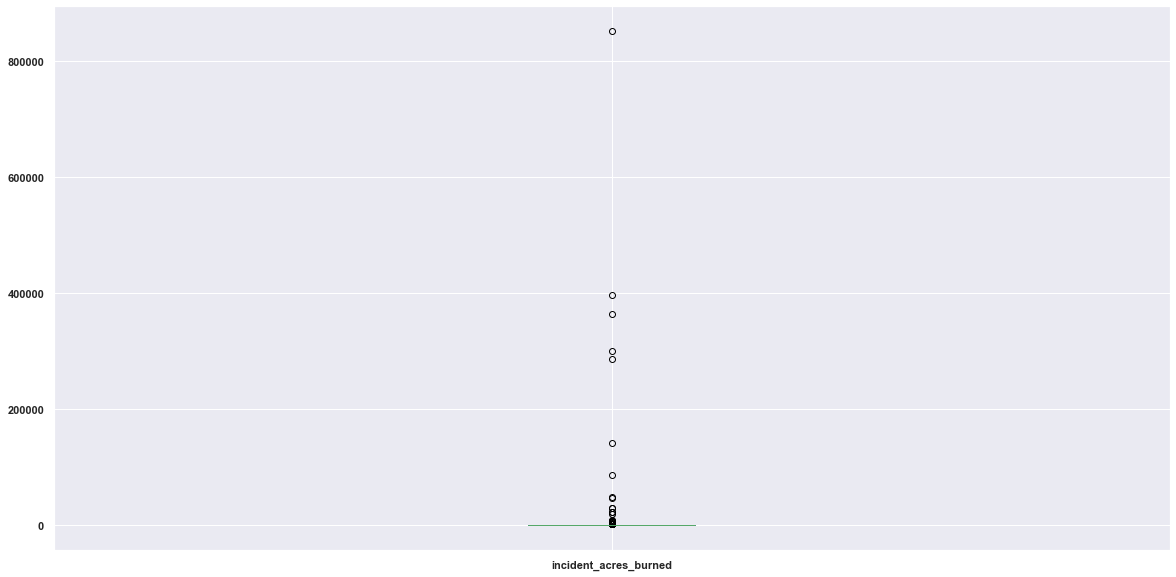

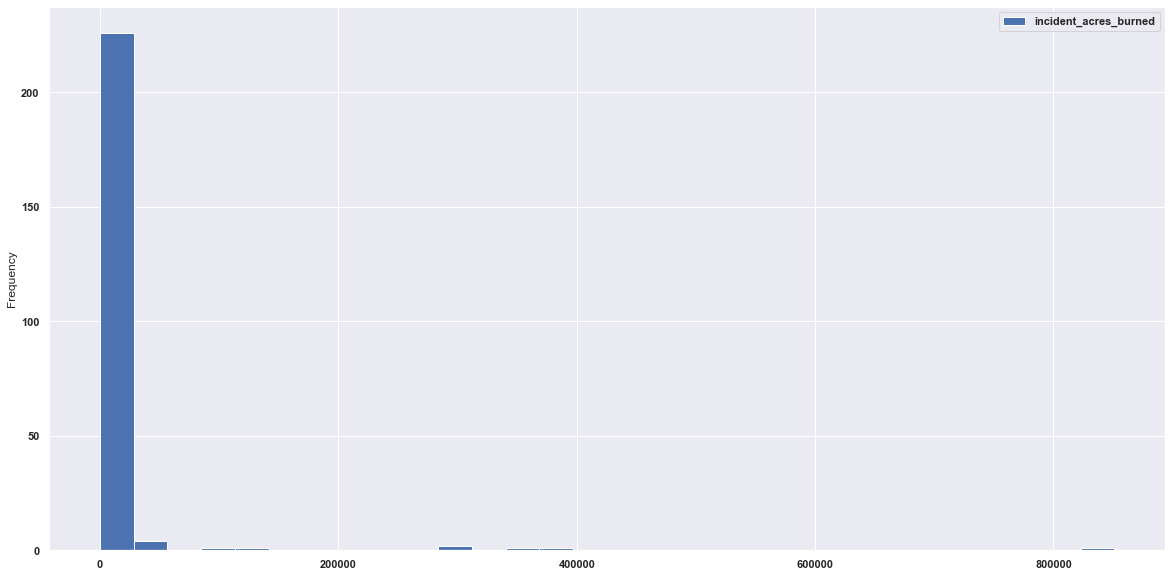

In [90]:
print(df_wf.loc[dt_filt, ['incident_acres_burned']].describe())
df_wf.loc[dt_filt, ['incident_acres_burned']].plot(kind='box',figsize=(20,10))
df_wf.loc[dt_filt, ['incident_acres_burned']].plot(kind='hist',bins=30,figsize=(20,10) )

In [91]:
# Top 25% seems like a good choice 

In [92]:
affected_county_ = df_wf.loc[(dt_filt &( df_wf['incident_acres_burned']>557)), 'incident_county'].unique()

In [93]:
len(affected_county_)

37

In [94]:
# some of the counties entry has more than one county: let's decouple them 

In [95]:
def unique_str_list(List):
    """
    unit test
    test=['a,b,c','d']
    unique_str_list(test)
    """
    new_list = []
    for i in List:
        if len(i.split(','))>0:
            new_list+= [x.strip() for x in i.split(',')]
        else:
            new_list +=[i]
    return new_list

In [96]:
affected_county__ = unique_str_list(affected_county_)

In [97]:
affected_county__

['Kings',
 'San Luis Obispo',
 'Santa Barbara',
 'Placer',
 'Solano',
 'San Diego',
 'Ventura',
 'Sacramento',
 'San Benito',
 'Calaveras',
 'Tulare',
 'Lassen',
 'State of Nevada',
 'Merced',
 'Kern',
 'Los Angeles',
 'Madera',
 'Santa Clara',
 'Fresno',
 'Colusa',
 'Yuba',
 'Sierra',
 'Glenn',
 'Monterey',
 'Mendocino',
 'Humboldt',
 'Nevada',
 'Santa Cruz',
 'San Mateo',
 'Santa Clara',
 'Alameda',
 'Contra Costa',
 'San Joaquin',
 'Stanislaus',
 'Mendocino',
 'Napa',
 'Sonoma',
 'Lake',
 'Yolo',
 'Solano',
 'Plumas',
 'Butte',
 'Tehama',
 'Glenn',
 'Tuolumne',
 'Plumas',
 'Fresno',
 'Madera',
 'San Bernardino',
 'Riverside',
 'Riverside']

In [98]:
len(df_mov_cal.polygon_name.unique())

56

In [99]:
df_mov_cal.polygon_name.unique()

array(['Alameda', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn',
       'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino',
       'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange',
       'Placer', 'Plumas', 'Riverside', 'Sacramento', 'San Benito',
       'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin',
       'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara',
       'Santa Cruz', 'Shasta', 'Siskiyou', 'Solano', 'Sonoma',
       'Stanislaus', 'Sutter', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne',
       'Ventura', 'Yolo', 'Yuba'], dtype=object)

In [100]:
df_mov_cal[df_mov_cal.polygon_name=='Modoc']

ds country polygon_name  \
2802347 2020-03-18     USA        Modoc   
2802348 2020-04-14     USA        Modoc   
2802349 2020-04-15     USA        Modoc   
2802350 2020-04-16     USA        Modoc   
2802351 2020-04-26     USA        Modoc   
2802352 2020-05-10     USA        Modoc   

         all_day_bing_tiles_visited_relative_change  \
2802347                                    -0.13401   
2802348                                    -0.06259   
2802349                                    -0.08886   
2802350                                    -0.01337   
2802351                                     0.11327   
2802352                                     0.18710   

         all_day_ratio_single_tile_users   FIPS NECMA  ST   COUNTY/TOWN  
2802347                          0.31429  06049     0  CA  Modoc County  
2802348                          0.24501  06049     0  CA  Modoc County  
2802349                          0.26321  06049     0  CA  Modoc County  
2802350                          0.26782  06049     0  CA  Modoc County  
2802351                          0.28350  06049     0  CA  Modoc County  
2802352                          0.25644  06049     0  CA  Modoc County

In [101]:
unaffected_county = list(set(df_mov_cal.polygon_name.unique()).difference(set(affected_county__)).difference(set(evac)))

In [102]:
print(unaffected_county)
print(len(unaffected_county))

['El Dorado', 'Inyo', 'Mariposa', 'Del Norte', 'Mono', 'Marin', 'Imperial', 'Sutter', 'Orange', 'Trinity', 'Modoc', 'Shasta', 'Amador', 'San Francisco']
14


### 2. Visualizing mobility related index

In [103]:
df_mov_cal

ds country polygon_name  \
2797632 2020-03-01     USA      Alameda   
2797633 2020-03-02     USA      Alameda   
2797634 2020-03-03     USA      Alameda   
2797635 2020-03-04     USA      Alameda   
2797636 2020-03-05     USA      Alameda   
...            ...     ...          ...   
2808893 2020-09-17     USA         Yuba   
2808894 2020-09-18     USA         Yuba   
2808895 2020-09-19     USA         Yuba   
2808896 2020-09-20     USA         Yuba   
2808897 2020-09-21     USA         Yuba   

         all_day_bing_tiles_visited_relative_change  \
2797632                                    -0.03427   
2797633                                     0.00809   
2797634                                     0.02790   
2797635                                     0.00709   
2797636                                    -0.01875   
...                                             ...   
2808893                                    -0.14612   
2808894                                    -0.13744   
2808895                                    -0.07286   
2808896                                    -0.08517   
2808897                                    -0.13983   

         all_day_ratio_single_tile_users   FIPS NECMA  ST     COUNTY/TOWN  
2797632                          0.17180  06001  5775  CA  Alameda County  
2797633                          0.11710  06001  5775  CA  Alameda County  
2797634                          0.10671  06001  5775  CA  Alameda County  
2797635                          0.11393  06001  5775  CA  Alameda County  
2797636                          0.11610  06001  5775  CA  Alameda County  
...                                  ...    ...   ...  ..             ...  
2808893                          0.21364  06115  9340  CA     Yuba County  
2808894                          0.20086  06115  9340  CA     Yuba County  
2808895                          0.22292  06115  9340  CA     Yuba County  
2808896                          0.26023  06115  9340  CA     Yuba County  
2808897                          0.21911  06115  9340  CA     Yuba County  

[11266 rows x 9 columns]

In [104]:
sorted(evac)
sorted(unaffected_county)

['Amador',
 'Del Norte',
 'El Dorado',
 'Imperial',
 'Inyo',
 'Marin',
 'Mariposa',
 'Modoc',
 'Mono',
 'Orange',
 'San Francisco',
 'Shasta',
 'Sutter',
 'Trinity']

In [105]:
# Plumas	North Complex	2020-08-17
# Fresno	Creek Fire	2020-09-04
# San Bernardino	El Dorao Fire	2020-09-05
# Siskiyou	Fox Fire	2020-09-14
# Los Angeles	Bob Cat 	2020-09-06

In [106]:
filt_counter=df_mov_cal["polygon_name"].isin(unaffected_county)
filt_treat = df_mov_cal["polygon_name"].isin(evac)
dict_fire = {'Plumas':['North Complex','2020-08-17'],'Fresno':['Creek Fire','2020-09-04'],'San Bernardino':['El Dorao Fire','2020-09-05'],
             'Siskiyou':['Fox Fire','2020-09-14'],'Los Angeles':['Bob Cat','2020-09-06']}

In [107]:
# TODO
def annotate_fire(ax,df,col):
    annotate_params = dict(xytext=(40, 10), textcoords='offset points', arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='right', verticalalignment='bottom',)
    annotate_params2 = dict(xytext=(40, -10), textcoords='offset points', arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='right', verticalalignment='bottom')
    
    for i  in dict_fire:
        xpos= dict_fire[i][-1]
        ypos= df.loc[(df["polygon_name"]==i) &(df["ds"]==xpos),col].values[0]
        ax.annotate(dict_fire[i][0]+""+xpos,(xpos, ypos), **annotate_params)
    return ax

In [108]:
df_mov_cal[filt_treat].pivot(index="ds",columns= "polygon_name",values="all_day_bing_tiles_visited_relative_change").reset_index()

polygon_name         ds   Fresno  Los Angeles   Plumas  San Bernardino  \
0            2020-03-01  0.01228     -0.01012  0.10214         0.01388   
1            2020-03-02 -0.00887      0.00395 -0.02729         0.00688   
2            2020-03-03  0.01511      0.02396  0.08327         0.04672   
3            2020-03-04  0.01035     -0.00217  0.04610         0.02463   
4            2020-03-05 -0.00167     -0.00293  0.00313         0.00902   
..                  ...      ...          ...      ...             ...   
200          2020-09-17 -0.16529     -0.24007  0.04804        -0.18870   
201          2020-09-18 -0.15870     -0.20875 -0.11332        -0.15936   
202          2020-09-19 -0.08621     -0.17100 -0.04366        -0.10392   
203          2020-09-20 -0.07965     -0.16334  0.23684        -0.09114   
204          2020-09-21 -0.15520     -0.20541  0.01797        -0.14612   

polygon_name  Siskiyou  
0              0.12979  
1              0.15152  
2              0.09058  
3              0.07916  
4              0.08630  
..                 ...  
200            0.00270  
201           -0.04661  
202           -0.02004  
203            0.23046  
204            0.07978  

[205 rows x 6 columns]

### 2a. Visualizing changes in Mobility index

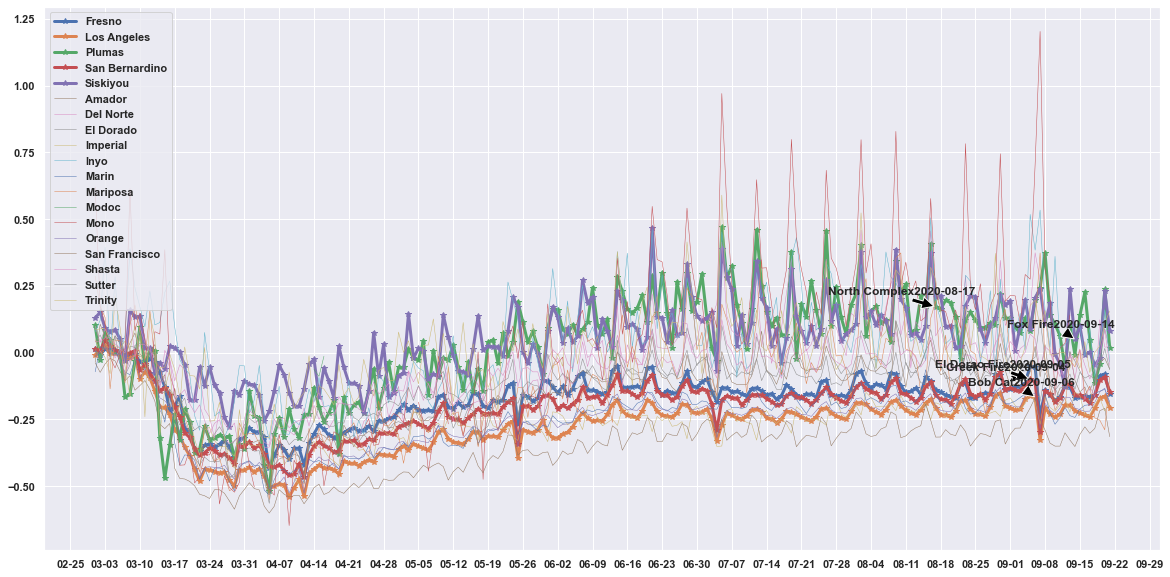

In [109]:
# TODO: 1) Combine line plots and use different marker for the lines in treatment counties 2) Annotate the graph


import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
pd.options.plotting.backend = "plotly"
import plotly.graph_objects as go

# Interactive plot
ax= df_mov_cal[filt_treat].pivot(index="ds",columns= "polygon_name",values="all_day_bing_tiles_visited_relative_change").plot(kind='line')
ax.update_xaxes(
    #dtick="W",)
    tickformat= '%Y-%m-%d',
   tickmode= 'auto',
)
ax.show()

# Interactive plot
ax= df_mov_cal[filt_counter].pivot(index="ds",columns= "polygon_name",values="all_day_bing_tiles_visited_relative_change").plot(kind='line')
ax.update_xaxes(
     tickformat= '%Y-%m-%d',
   tickmode= 'auto')
ax.show()


fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df_mov_cal[filt_treat].pivot(index="ds",columns= "polygon_name",values="all_day_bing_tiles_visited_relative_change"),marker="*",linewidth=3)
ax.plot(df_mov_cal[filt_counter].pivot(index="ds",columns= "polygon_name",values="all_day_bing_tiles_visited_relative_change"), linewidth=0.5)
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.legend(sorted(evac)+sorted(unaffected_county))
# Ensure a major tick for each week using (interval=1) 
ax=  annotate_fire(ax,df_mov_cal,'all_day_bing_tiles_visited_relative_change')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.show()



### 2.b Visualizing changes in Stay in put index

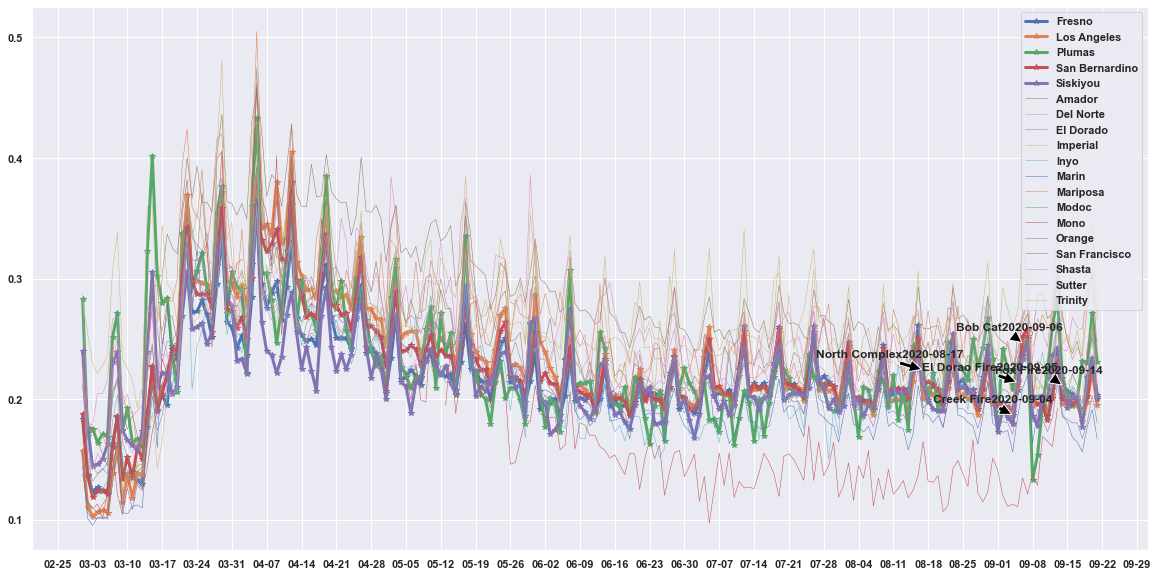

In [110]:
# Interactive plot
ax= df_mov_cal[filt_treat].pivot(index="ds",columns= "polygon_name",values="all_day_ratio_single_tile_users").plot(kind='line')
ax.update_xaxes(
     tickformat= '%Y-%m-%d',
   tickmode= 'auto',)

ax.show()

# Interactive plot
ax= df_mov_cal[filt_counter].pivot(index="ds",columns= "polygon_name",values="all_day_ratio_single_tile_users").plot(kind='line')
ax.update_xaxes(
     tickformat= '%Y-%m-%d',
   tickmode= 'auto',)
ax.show()

filt_counter=df_mov_cal["polygon_name"].isin(unaffected_county)
filt_treat = df_mov_cal["polygon_name"].isin(evac)
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df_mov_cal[filt_treat].pivot(index="ds",columns= "polygon_name",values="all_day_ratio_single_tile_users"),marker="*",linewidth=3)
ax.plot(df_mov_cal[filt_counter].pivot(index="ds",columns= "polygon_name",values="all_day_ratio_single_tile_users"), linewidth=0.5)
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.legend(sorted(evac)+sorted(unaffected_county))
# Ensure a major tick for each week using (interval=1) 
ax=  annotate_fire(ax,df_mov_cal,'all_day_ratio_single_tile_users')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

plt.show()


### Diff-in-Diff analysis

In [111]:
# Using CausalImpact, I'll infer the mobility differential in affected counties
# Reference on how to use Causal Impact:https://nbviewer.jupyter.org/github/dafiti/causalimpact/blob/master/examples/getting_started.ipynb

In [112]:
print(unaffected_county)
print(evac)

['El Dorado', 'Inyo', 'Mariposa', 'Del Norte', 'Mono', 'Marin', 'Imperial', 'Sutter', 'Orange', 'Trinity', 'Modoc', 'Shasta', 'Amador', 'San Francisco']
['Plumas', 'Fresno', 'San Bernardino', 'Siskiyou', 'Los Angeles']


In [113]:
filt_counter=df_mov_cal["polygon_name"].isin(unaffected_county)
filt_treat = df_mov_cal["polygon_name"].isin(evac)
dict_fire = {'Plumas':['North Complex','2020-08-17'],'Fresno':['Creek Fire','2020-09-04'],'San Bernardino':['El Dorao Fire','2020-09-05'],
             'Siskiyou':['Fox Fire','2020-09-14'],'Los Angeles':['Bob Cat','2020-09-06']}

In [114]:
def causal_analysis(df,county,counter_county):
    """
    df: pivoted dataframe: df_mov_cal[filt_treat].pivot(index="ds",columns= "polygon_name",values="all_day_bing_tiles_visited_relative_change")
    """
    pre_period = [df.index.min(), dict_fire[county][-1]]
    post_period = [df.index[df.index>dict_fire[county][-1]][0], df.index.max()]
    data = df[[county]+counter_county]
    
    print(pre_period)
    print(post_period)
    print(data.head())
    
    ci = CausalImpact(data, pre_period, post_period)
    print(ci.summary())
    ci.plot()
    print(ci.trained_model.params)


In [115]:
# Causal for movement 

In [116]:
df_mov_cal[(df_mov_cal["polygon_name"].isin(evac+unaffected_county))&(df_mov_cal["polygon_name"]=='Modoc')].head()

ds country polygon_name  \
2802347 2020-03-18     USA        Modoc   
2802348 2020-04-14     USA        Modoc   
2802349 2020-04-15     USA        Modoc   
2802350 2020-04-16     USA        Modoc   
2802351 2020-04-26     USA        Modoc   

         all_day_bing_tiles_visited_relative_change  \
2802347                                    -0.13401   
2802348                                    -0.06259   
2802349                                    -0.08886   
2802350                                    -0.01337   
2802351                                     0.11327   

         all_day_ratio_single_tile_users   FIPS NECMA  ST   COUNTY/TOWN  
2802347                          0.31429  06049     0  CA  Modoc County  
2802348                          0.24501  06049     0  CA  Modoc County  
2802349                          0.26321  06049     0  CA  Modoc County  
2802350                          0.26782  06049     0  CA  Modoc County  
2802351                          0.28350  06049     0  CA  Modoc County

In [117]:
# Checking Null values before the causal analysis
df_mov_cal[df_mov_cal["polygon_name"].isin(evac+unaffected_county)].pivot(index="ds",columns= "polygon_name",values="all_day_bing_tiles_visited_relative_change").info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 205 entries, 2020-03-01 to 2020-09-21
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Amador          205 non-null    float64
 1   Del Norte       205 non-null    float64
 2   El Dorado       205 non-null    float64
 3   Fresno          205 non-null    float64
 4   Imperial        205 non-null    float64
 5   Inyo            205 non-null    float64
 6   Los Angeles     205 non-null    float64
 7   Marin           205 non-null    float64
 8   Mariposa        205 non-null    float64
 9   Modoc           6 non-null      float64
 10  Mono            190 non-null    float64
 11  Orange          205 non-null    float64
 12  Plumas          205 non-null    float64
 13  San Bernardino  205 non-null    float64
 14  San Francisco   205 non-null    float64
 15  Shasta          205 non-null    float64
 16  Siskiyou        205 non-null    float64
 17  Sutter          

In [118]:
# Dropping Modoc and imputing Mono county 
df_mov_cal_=df_mov_cal[df_mov_cal.polygon_name!="Modoc"]
df_mov_cal_[df_mov_cal_.polygon_name=="Modoc"]
unaffected_county =[cn for cn in unaffected_county if cn != "Modoc"]
print(unaffected_county)

['El Dorado', 'Inyo', 'Mariposa', 'Del Norte', 'Mono', 'Marin', 'Imperial', 'Sutter', 'Orange', 'Trinity', 'Shasta', 'Amador', 'San Francisco']


In [119]:
#Mono imputation will use "time" method in interpolate
# df = df.assign(InterpolateTime=df.target.interpolate(method='time'))



Causal analysis for:Plumas
[Timestamp('2020-03-01 00:00:00'), '2020-08-17']
[Timestamp('2020-08-18 00:00:00'), Timestamp('2020-09-21 00:00:00')]
polygon_name   Plumas  El Dorado     Inyo  Mariposa  Del Norte     Mono  \
ds                                                                        
2020-03-01    0.10214    0.03916  0.07871   0.28583    0.09936  0.62017   
2020-03-02   -0.02729    0.06615  0.12113   0.17285    0.03880  0.17626   
2020-03-03    0.08327    0.02393  0.39449   0.13198    0.05621  0.10334   
2020-03-04    0.04610    0.00883 -0.01898  -0.13547    0.05562 -0.01835   
2020-03-05    0.00313    0.00097  0.28407   0.04758   -0.02042 -0.05716   

polygon_name    Marin  Imperial   Sutter   Orange  Trinity   Shasta   Amador  \
ds                                                                             
2020-03-01   -0.07173   0.08537  0.01243 -0.01366  0.04895  0.04171 -0.03571   
2020-03-02    0.02216   0.08907 -0.02994  0.00179  0.00512  0.04010  0.10684   
2020-03

/Users/mk707t/anaconda3/envs/symp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Users/mk707t/anaconda3/envs/symp/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/mk707t/anaconda3/envs/symp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    0.11               3.99
Prediction (s.d.)         0.13 (0.02)        4.51 (0.77)
95% CI                    [0.09, 0.17]       [3.04, 6.06]

Absolute effect (s.d.)    -0.01 (0.02)       -0.52 (0.77)
95% CI                    [-0.06, 0.03]      [-2.07, 0.95]

Relative effect (s.d.)    -11.45% (17.07%)   -11.45% (17.07%)
95% CI                    [-45.93%, 20.99%]  [-45.93%, 20.99%]

Posterior tail-area probability p: 0.23
Posterior prob. of a causal effect: 76.52%

For more details run the command: print(impact.summary('report'))


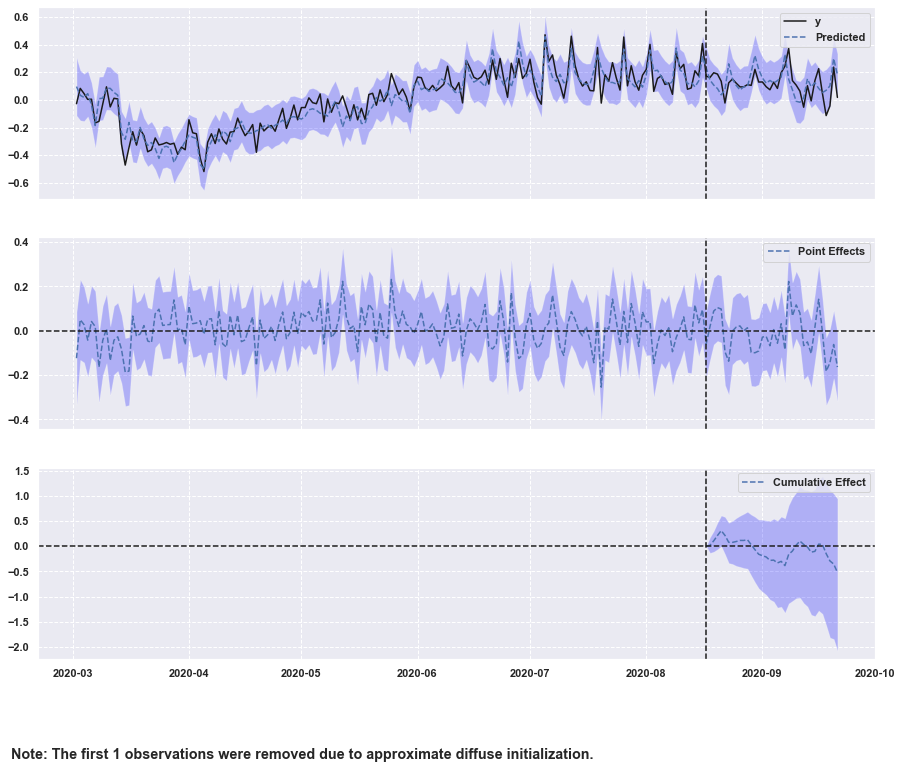

sigma2.irregular      0.131909
sigma2.level          0.000144
beta.El Dorado        0.693702
beta.Inyo            -0.032141
beta.Mariposa         0.044996
beta.Del Norte       -0.039464
beta.Mono             0.102009
beta.Marin            0.280088
beta.Imperial        -0.215634
beta.Sutter           0.287027
beta.Orange          -0.276134
beta.Trinity          0.004179
beta.Shasta           0.187046
beta.Amador          -0.098569
beta.San Francisco   -0.226498
dtype: float64


Causal analysis for:Fresno
[Timestamp('2020-03-01 00:00:00'), '2020-09-04']
[Timestamp('2020-09-05 00:00:00'), Timestamp('2020-09-21 00:00:00')]
polygon_name   Fresno  El Dorado     Inyo  Mariposa  Del Norte     Mono  \
ds                                                                        
2020-03-01    0.01228    0.03916  0.07871   0.28583    0.09936  0.62017   
2020-03-02   -0.00887    0.06615  0.12113   0.17285    0.03880  0.17626   
2020-03-03    0.01511    0.02393  0.39449   0.13198    0.05621  0.10334  

/Users/mk707t/anaconda3/envs/symp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Users/mk707t/anaconda3/envs/symp/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/mk707t/anaconda3/envs/symp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    -0.14              -2.39
Prediction (s.d.)         -0.14 (0.01)       -2.39 (0.11)
95% CI                    [-0.15, -0.13]     [-2.62, -2.18]

Absolute effect (s.d.)    0.0 (0.01)         0.0 (0.11)
95% CI                    [-0.01, 0.01]      [-0.21, 0.23]

Relative effect (s.d.)    -0.14% (4.69%)     -0.14% (4.69%)
95% CI                    [-9.69%, 8.7%]     [-9.69%, 8.7%]

Posterior tail-area probability p: 0.47
Posterior prob. of a causal effect: 53.05%

For more details run the command: print(impact.summary('report'))


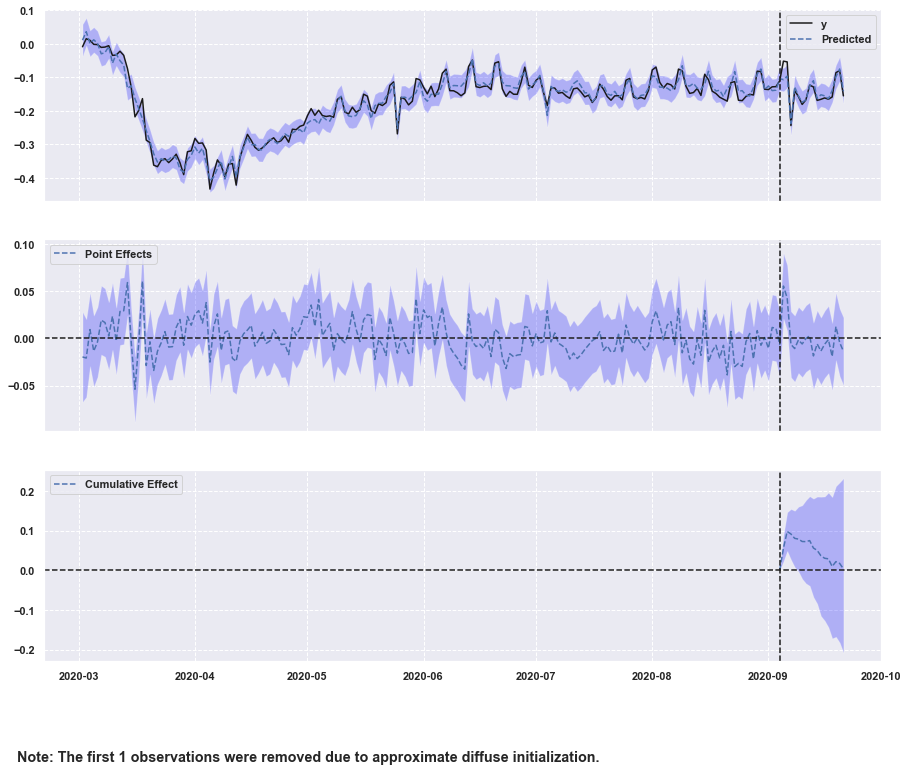

sigma2.irregular      0.032679
sigma2.level          0.000144
beta.El Dorado       -0.139605
beta.Inyo            -0.030623
beta.Mariposa         0.025980
beta.Del Norte       -0.006356
beta.Mono            -0.010183
beta.Marin           -0.150674
beta.Imperial        -0.065993
beta.Sutter           0.192122
beta.Orange           0.852842
beta.Trinity          0.010688
beta.Shasta           0.100473
beta.Amador           0.125238
beta.San Francisco    0.099642
dtype: float64


Causal analysis for:San Bernardino
[Timestamp('2020-03-01 00:00:00'), '2020-09-05']
[Timestamp('2020-09-06 00:00:00'), Timestamp('2020-09-21 00:00:00')]
polygon_name  San Bernardino  El Dorado     Inyo  Mariposa  Del Norte  \
ds                                                                      
2020-03-01           0.01388    0.03916  0.07871   0.28583    0.09936   
2020-03-02           0.00688    0.06615  0.12113   0.17285    0.03880   
2020-03-03           0.04672    0.02393  0.39449   0.13198    0.05621   


/Users/mk707t/anaconda3/envs/symp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Users/mk707t/anaconda3/envs/symp/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/mk707t/anaconda3/envs/symp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    -0.15              -2.48
Prediction (s.d.)         -0.15 (0.01)       -2.4 (0.08)
95% CI                    [-0.16, -0.14]     [-2.56, -2.24]

Absolute effect (s.d.)    -0.01 (0.01)       -0.08 (0.08)
95% CI                    [-0.02, 0.0]       [-0.24, 0.08]

Relative effect (s.d.)    3.4% (3.39%)       3.4% (3.39%)
95% CI                    [-3.29%, 10.01%]   [-3.29%, 10.01%]

Posterior tail-area probability p: 0.16
Posterior prob. of a causal effect: 83.82%

For more details run the command: print(impact.summary('report'))


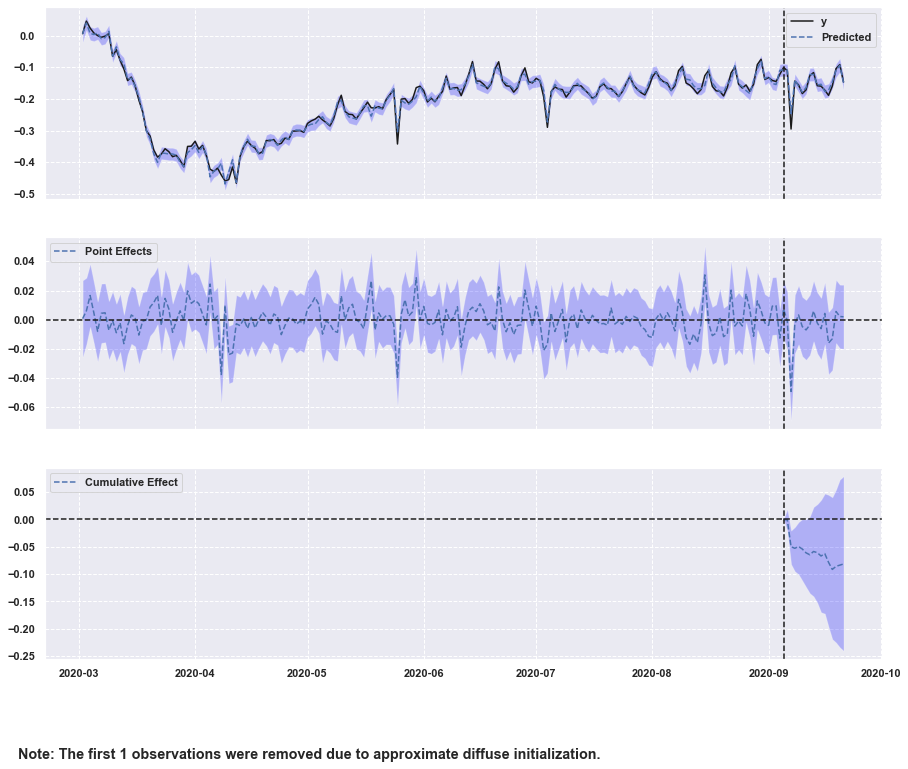

sigma2.irregular      0.007950
sigma2.level          0.000142
beta.El Dorado       -0.076278
beta.Inyo            -0.007789
beta.Mariposa         0.010181
beta.Del Norte        0.018636
beta.Mono             0.047270
beta.Marin           -0.076065
beta.Imperial         0.062459
beta.Sutter           0.112925
beta.Orange           1.003797
beta.Trinity          0.004335
beta.Shasta           0.084757
beta.Amador          -0.044095
beta.San Francisco   -0.121098
dtype: float64


Causal analysis for:Siskiyou
[Timestamp('2020-03-01 00:00:00'), '2020-09-14']
[Timestamp('2020-09-15 00:00:00'), Timestamp('2020-09-21 00:00:00')]
polygon_name  Siskiyou  El Dorado     Inyo  Mariposa  Del Norte     Mono  \
ds                                                                         
2020-03-01     0.12979    0.03916  0.07871   0.28583    0.09936  0.62017   
2020-03-02     0.15152    0.06615  0.12113   0.17285    0.03880  0.17626   
2020-03-03     0.09058    0.02393  0.39449   0.13198    0.05621  0.

/Users/mk707t/anaconda3/envs/symp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Users/mk707t/anaconda3/envs/symp/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/mk707t/anaconda3/envs/symp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    0.05               0.34
Prediction (s.d.)         0.05 (0.02)        0.33 (0.16)
95% CI                    [0.0, 0.09]        [0.01, 0.65]

Absolute effect (s.d.)    0.0 (0.02)         0.01 (0.16)
95% CI                    [-0.04, 0.05]      [-0.31, 0.33]

Relative effect (s.d.)    2.19% (49.11%)     2.19% (49.11%)
95% CI                    [-92.9%, 99.62%]   [-92.9%, 99.62%]

Posterior tail-area probability p: 0.45
Posterior prob. of a causal effect: 54.75%

For more details run the command: print(impact.summary('report'))


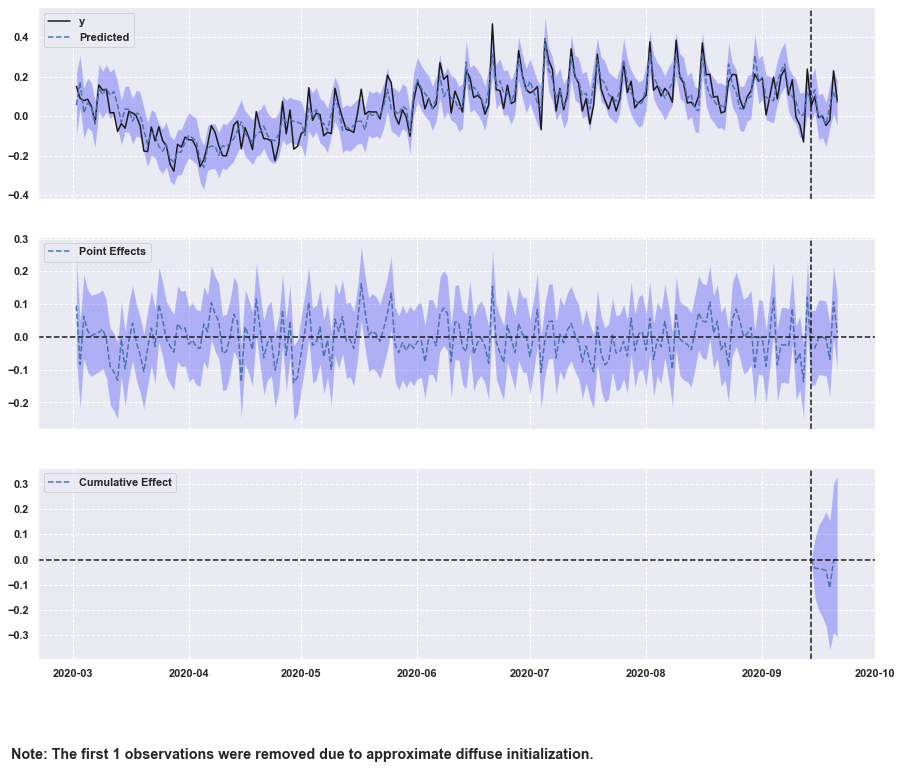

sigma2.irregular      0.178980
sigma2.level          0.000069
beta.El Dorado        0.133391
beta.Inyo             0.151982
beta.Mariposa         0.246844
beta.Del Norte        0.265518
beta.Mono             0.084686
beta.Marin           -0.195187
beta.Imperial        -0.073831
beta.Sutter           0.179432
beta.Orange           0.076058
beta.Trinity         -0.022607
beta.Shasta           0.467752
beta.Amador          -0.096969
beta.San Francisco   -0.307737
dtype: float64


Causal analysis for:Los Angeles
[Timestamp('2020-03-01 00:00:00'), '2020-09-06']
[Timestamp('2020-09-07 00:00:00'), Timestamp('2020-09-21 00:00:00')]
polygon_name  Los Angeles  El Dorado     Inyo  Mariposa  Del Norte     Mono  \
ds                                                                            
2020-03-01       -0.01012    0.03916  0.07871   0.28583    0.09936  0.62017   
2020-03-02        0.00395    0.06615  0.12113   0.17285    0.03880  0.17626   
2020-03-03        0.02396    0.02393  0.39449   0.13

/Users/mk707t/anaconda3/envs/symp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Users/mk707t/anaconda3/envs/symp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    -0.22              -3.3
Prediction (s.d.)         -0.21 (0.0)        -3.2 (0.07)
95% CI                    [-0.22, -0.2]      [-3.33, -3.06]

Absolute effect (s.d.)    -0.01 (0.0)        -0.1 (0.07)
95% CI                    [-0.02, 0.0]       [-0.23, 0.04]

Relative effect (s.d.)    3.07% (2.15%)      3.07% (2.15%)
95% CI                    [-1.17%, 7.27%]    [-1.17%, 7.27%]

Posterior tail-area probability p: 0.08
Posterior prob. of a causal effect: 92.11%

For more details run the command: print(impact.summary('report'))


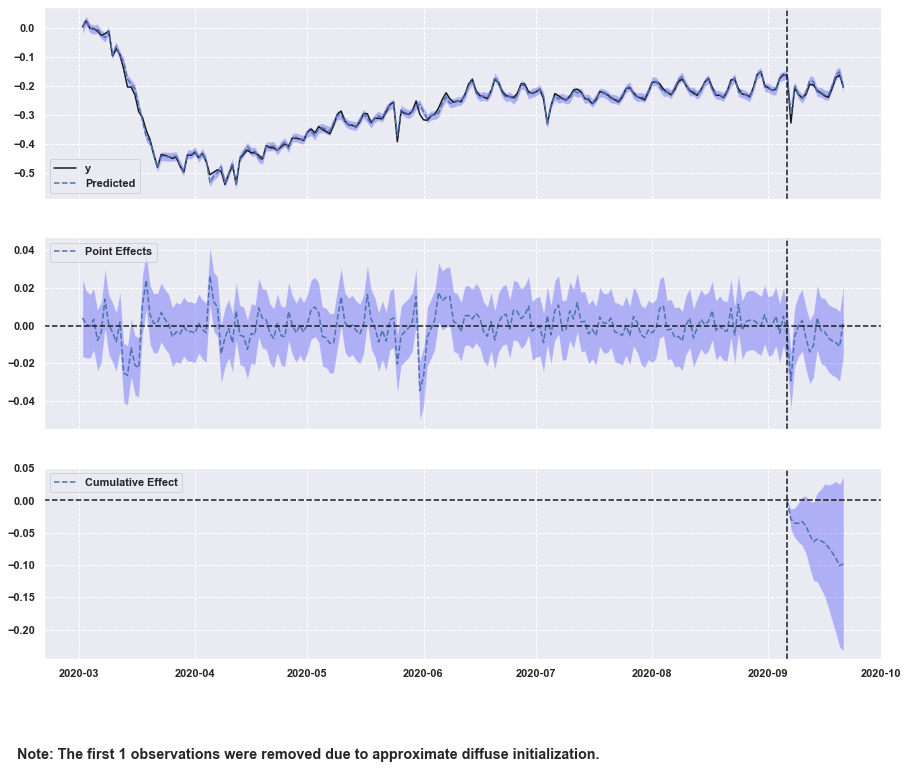

sigma2.irregular      0.004065
sigma2.level          0.000144
beta.El Dorado       -0.034158
beta.Inyo            -0.011976
beta.Mariposa         0.025997
beta.Del Norte       -0.000776
beta.Mono            -0.012813
beta.Marin           -0.012931
beta.Imperial         0.042749
beta.Sutter           0.013614
beta.Orange           0.897110
beta.Trinity          0.014678
beta.Shasta           0.011953
beta.Amador           0.003630
beta.San Francisco    0.051445
dtype: float64


In [120]:
df_causal= df_mov_cal_[df_mov_cal_["polygon_name"].isin(evac+unaffected_county)].pivot(index="ds",columns= "polygon_name",values="all_day_bing_tiles_visited_relative_change")

ax= df_causal.Mono.plot()
ax.show()

df_causal.Mono= df_causal.Mono.interpolate(method='time')
ax= df_causal.Mono.plot()
ax.show()


for i in dict_fire:
    print("\n")
    print("====================================================================")
    print("Causal analysis for:{}".format(i))
   
    causal_analysis(df_causal,i,unaffected_county)
    

### Causal for Stay put 

Causal analysis for:Plumas
[Timestamp('2020-03-01 00:00:00'), '2020-08-17']
[Timestamp('2020-08-18 00:00:00'), Timestamp('2020-09-21 00:00:00')]
polygon_name   Plumas  El Dorado     Inyo  Mariposa  Del Norte     Mono  \
ds                                                                        
2020-03-01    0.28275    0.21648  0.21082   0.23671    0.28692  0.13818   
2020-03-02    0.16969    0.15211  0.16891   0.17581    0.17900  0.11431   
2020-03-03    0.17572    0.14365  0.12086   0.17369    0.17890  0.10927   
2020-03-04    0.16412    0.13851  0.12031   0.17569    0.20477  0.11324   
2020-03-05    0.17126    0.14268  0.12497   0.16972    0.20452  0.10142   

polygon_name    Marin  Imperial   Sutter   Orange  Trinity   Shasta   Amador  \
ds                                                                             
2020-03-01    0.14494   0.16656  0.21233  0.15535  0.28023  0.22129  0.22941   
2020-03-02    0.10126   0.11691  0.15031  0.10559  0.25445  0.16047  0.18310   
2020-03-0

/Users/mk707t/anaconda3/envs/symp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Users/mk707t/anaconda3/envs/symp/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/mk707t/anaconda3/envs/symp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    0.22               7.79
Prediction (s.d.)         0.21 (0.01)        7.45 (0.18)
95% CI                    [0.2, 0.22]        [7.1, 7.81]

Absolute effect (s.d.)    0.01 (0.01)        0.35 (0.18)
95% CI                    [-0.0, 0.02]       [-0.02, 0.69]

Relative effect (s.d.)    4.64% (2.45%)      4.64% (2.45%)
95% CI                    [-0.3%, 9.3%]      [-0.3%, 9.3%]

Posterior tail-area probability p: 0.03
Posterior prob. of a causal effect: 96.9%

For more details run the command: print(impact.summary('report'))


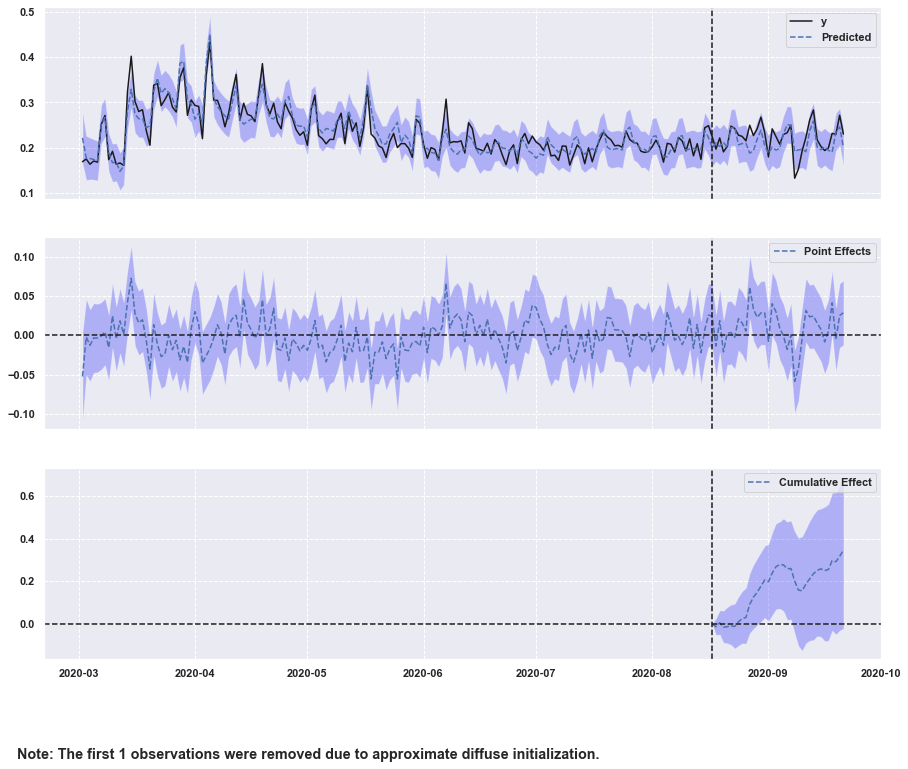

sigma2.irregular      0.144731
sigma2.level          0.000144
beta.El Dorado        0.619617
beta.Inyo             0.033286
beta.Mariposa         0.037290
beta.Del Norte       -0.000859
beta.Mono            -0.065327
beta.Marin            0.169266
beta.Imperial        -0.155507
beta.Sutter           0.254259
beta.Orange          -0.210317
beta.Trinity          0.162712
beta.Shasta           0.118523
beta.Amador           0.154714
beta.San Francisco   -0.275207
dtype: float64
Causal analysis for:Fresno
[Timestamp('2020-03-01 00:00:00'), '2020-09-04']
[Timestamp('2020-09-05 00:00:00'), Timestamp('2020-09-21 00:00:00')]
polygon_name   Fresno  El Dorado     Inyo  Mariposa  Del Norte     Mono  \
ds                                                                        
2020-03-01    0.18339    0.21648  0.21082   0.23671    0.28692  0.13818   
2020-03-02    0.13715    0.15211  0.16891   0.17581    0.17900  0.11431   
2020-03-03    0.12355    0.14365  0.12086   0.17369    0.17890  0.10927   


/Users/mk707t/anaconda3/envs/symp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Users/mk707t/anaconda3/envs/symp/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/mk707t/anaconda3/envs/symp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    0.21               3.58
Prediction (s.d.)         0.21 (0.0)         3.57 (0.04)
95% CI                    [0.21, 0.22]       [3.49, 3.66]

Absolute effect (s.d.)    0.0 (0.0)          0.01 (0.04)
95% CI                    [-0.0, 0.01]       [-0.08, 0.1]

Relative effect (s.d.)    0.37% (1.26%)      0.37% (1.26%)
95% CI                    [-2.21%, 2.73%]    [-2.21%, 2.73%]

Posterior tail-area probability p: 0.39
Posterior prob. of a causal effect: 60.74%

For more details run the command: print(impact.summary('report'))


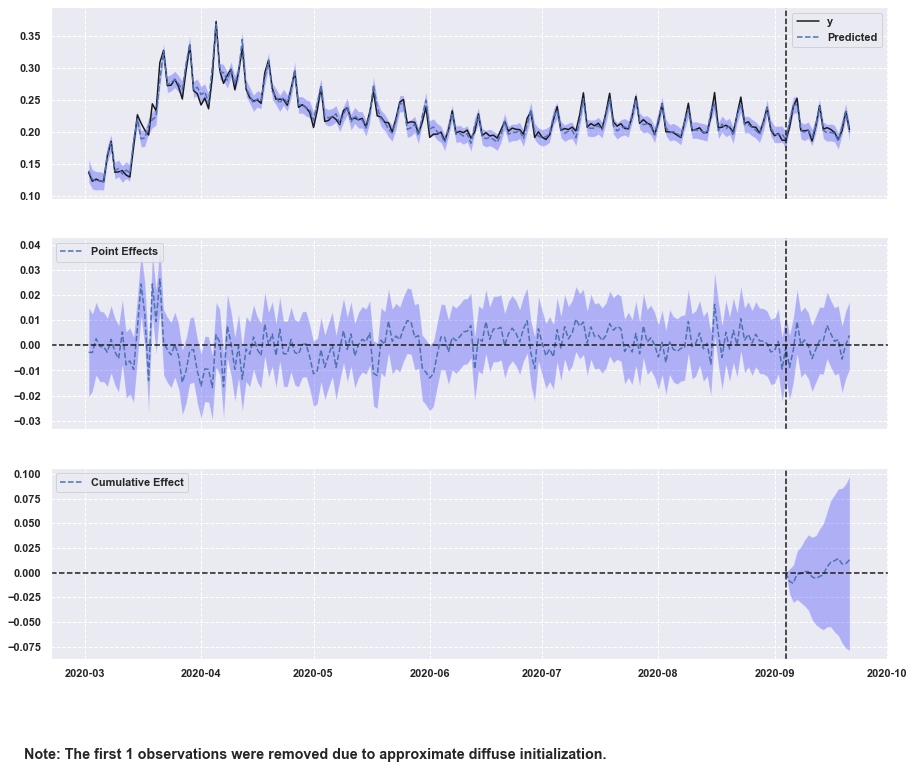

sigma2.irregular      0.026615
sigma2.level          0.000144
beta.El Dorado        0.100269
beta.Inyo             0.032536
beta.Mariposa         0.074698
beta.Del Norte       -0.079238
beta.Mono             0.032868
beta.Marin           -0.238552
beta.Imperial         0.204473
beta.Sutter           0.203091
beta.Orange           0.415541
beta.Trinity          0.022388
beta.Shasta           0.136114
beta.Amador           0.110263
beta.San Francisco    0.077228
dtype: float64
Causal analysis for:San Bernardino
[Timestamp('2020-03-01 00:00:00'), '2020-09-05']
[Timestamp('2020-09-06 00:00:00'), Timestamp('2020-09-21 00:00:00')]
polygon_name  San Bernardino  El Dorado     Inyo  Mariposa  Del Norte  \
ds                                                                      
2020-03-01           0.18760    0.21648  0.21082   0.23671    0.28692   
2020-03-02           0.13654    0.15211  0.16891   0.17581    0.17900   
2020-03-03           0.11897    0.14365  0.12086   0.17369    0.17890   
20

/Users/mk707t/anaconda3/envs/symp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Users/mk707t/anaconda3/envs/symp/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/mk707t/anaconda3/envs/symp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    0.21               3.33
Prediction (s.d.)         0.2 (0.0)          3.27 (0.04)
95% CI                    [0.2, 0.21]        [3.2, 3.34]

Absolute effect (s.d.)    0.0 (0.0)          0.06 (0.04)
95% CI                    [-0.0, 0.01]       [-0.01, 0.13]

Relative effect (s.d.)    1.85% (1.08%)      1.85% (1.08%)
95% CI                    [-0.2%, 4.03%]     [-0.2%, 4.03%]

Posterior tail-area probability p: 0.04
Posterior prob. of a causal effect: 95.6%

For more details run the command: print(impact.summary('report'))


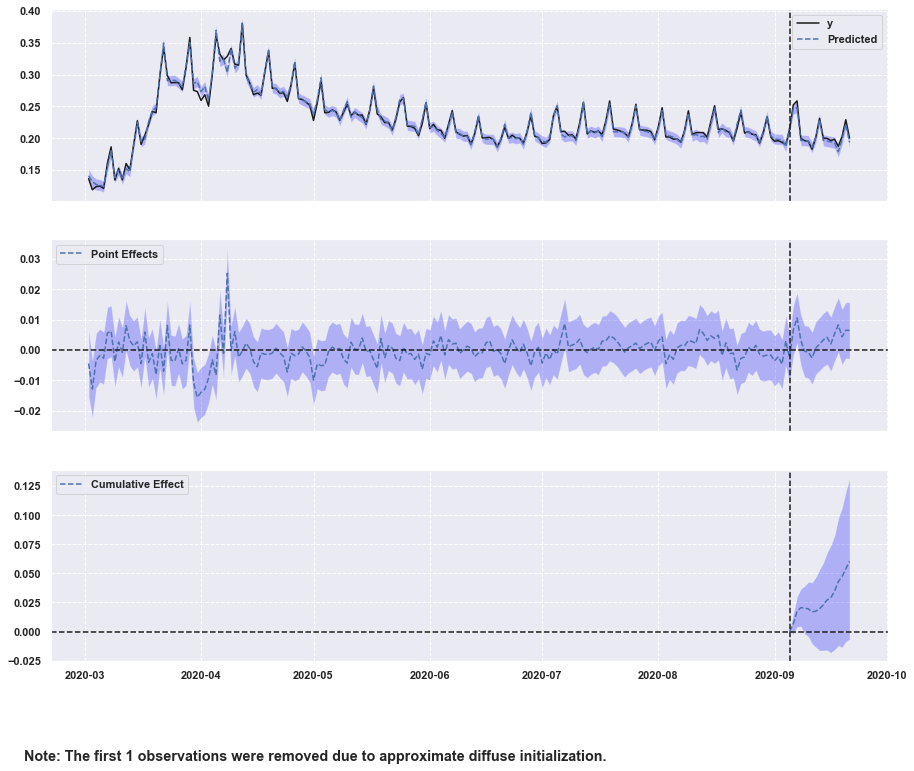

sigma2.irregular      0.007596
sigma2.level          0.000144
beta.El Dorado        0.024444
beta.Inyo             0.003547
beta.Mariposa         0.027229
beta.Del Norte       -0.015576
beta.Mono            -0.063387
beta.Marin           -0.025656
beta.Imperial         0.146810
beta.Sutter           0.025521
beta.Orange           0.868707
beta.Trinity          0.018231
beta.Shasta           0.017482
beta.Amador           0.047052
beta.San Francisco   -0.041802
dtype: float64
Causal analysis for:Siskiyou
[Timestamp('2020-03-01 00:00:00'), '2020-09-14']
[Timestamp('2020-09-15 00:00:00'), Timestamp('2020-09-21 00:00:00')]
polygon_name  Siskiyou  El Dorado     Inyo  Mariposa  Del Norte     Mono  \
ds                                                                         
2020-03-01     0.23980    0.21648  0.21082   0.23671    0.28692  0.13818   
2020-03-02     0.17658    0.15211  0.16891   0.17581    0.17900  0.11431   
2020-03-03     0.14468    0.14365  0.12086   0.17369    0.17890  0.10

/Users/mk707t/anaconda3/envs/symp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Users/mk707t/anaconda3/envs/symp/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/mk707t/anaconda3/envs/symp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    0.2                1.43
Prediction (s.d.)         0.21 (0.0)         1.44 (0.03)
95% CI                    [0.2, 0.21]        [1.39, 1.5]

Absolute effect (s.d.)    -0.0 (0.0)         -0.01 (0.03)
95% CI                    [-0.01, 0.01]      [-0.07, 0.04]

Relative effect (s.d.)    -0.78% (1.96%)     -0.78% (1.96%)
95% CI                    [-4.71%, 2.98%]    [-4.71%, 2.98%]

Posterior tail-area probability p: 0.36
Posterior prob. of a causal effect: 63.54%

For more details run the command: print(impact.summary('report'))


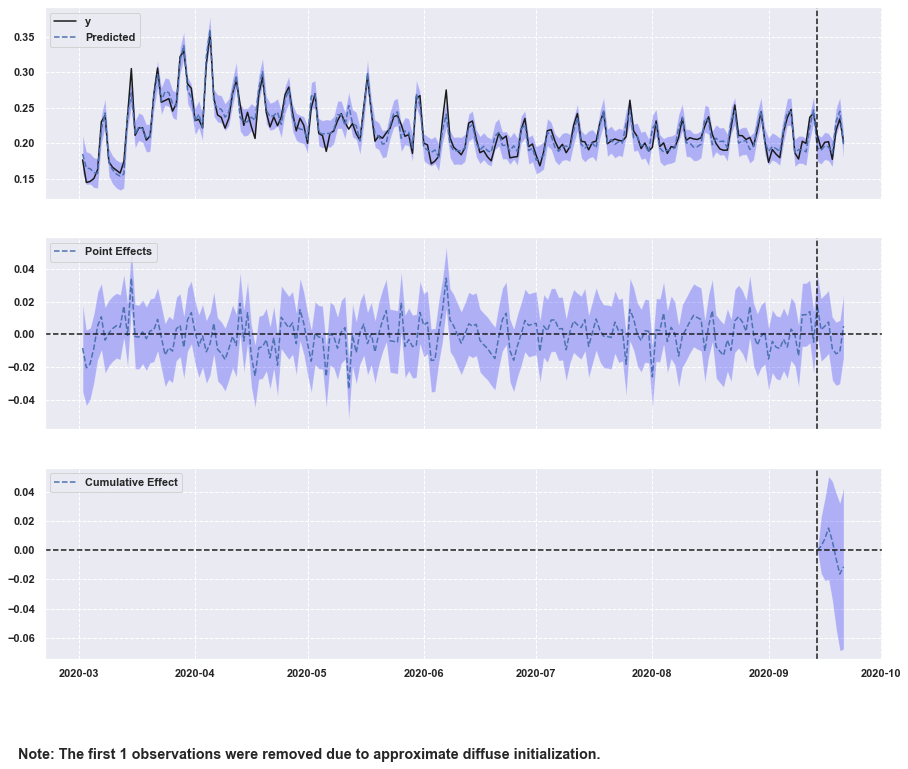

sigma2.irregular      0.079954
sigma2.level          0.000144
beta.El Dorado        0.336931
beta.Inyo             0.064707
beta.Mariposa         0.024336
beta.Del Norte        0.132151
beta.Mono            -0.144150
beta.Marin            0.088523
beta.Imperial         0.043324
beta.Sutter           0.092189
beta.Orange          -0.160893
beta.Trinity          0.171746
beta.Shasta           0.443695
beta.Amador           0.096740
beta.San Francisco   -0.209704
dtype: float64
Causal analysis for:Los Angeles
[Timestamp('2020-03-01 00:00:00'), '2020-09-06']
[Timestamp('2020-09-07 00:00:00'), Timestamp('2020-09-21 00:00:00')]
polygon_name  Los Angeles  El Dorado     Inyo  Mariposa  Del Norte     Mono  \
ds                                                                            
2020-03-01        0.15700    0.21648  0.21082   0.23671    0.28692  0.13818   
2020-03-02        0.11065    0.15211  0.16891   0.17581    0.17900  0.11431   
2020-03-03        0.10284    0.14365  0.12086   0.1736

/Users/mk707t/anaconda3/envs/symp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Users/mk707t/anaconda3/envs/symp/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/mk707t/anaconda3/envs/symp/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    0.2                3.05
Prediction (s.d.)         0.2 (0.0)          2.97 (0.03)
95% CI                    [0.19, 0.2]        [2.91, 3.04]

Absolute effect (s.d.)    0.0 (0.0)          0.07 (0.03)
95% CI                    [0.0, 0.01]        [0.01, 0.14]

Relative effect (s.d.)    2.46% (1.11%)      2.46% (1.11%)
95% CI                    [0.29%, 4.63%]     [0.29%, 4.63%]

Posterior tail-area probability p: 0.01
Posterior prob. of a causal effect: 98.5%

For more details run the command: print(impact.summary('report'))


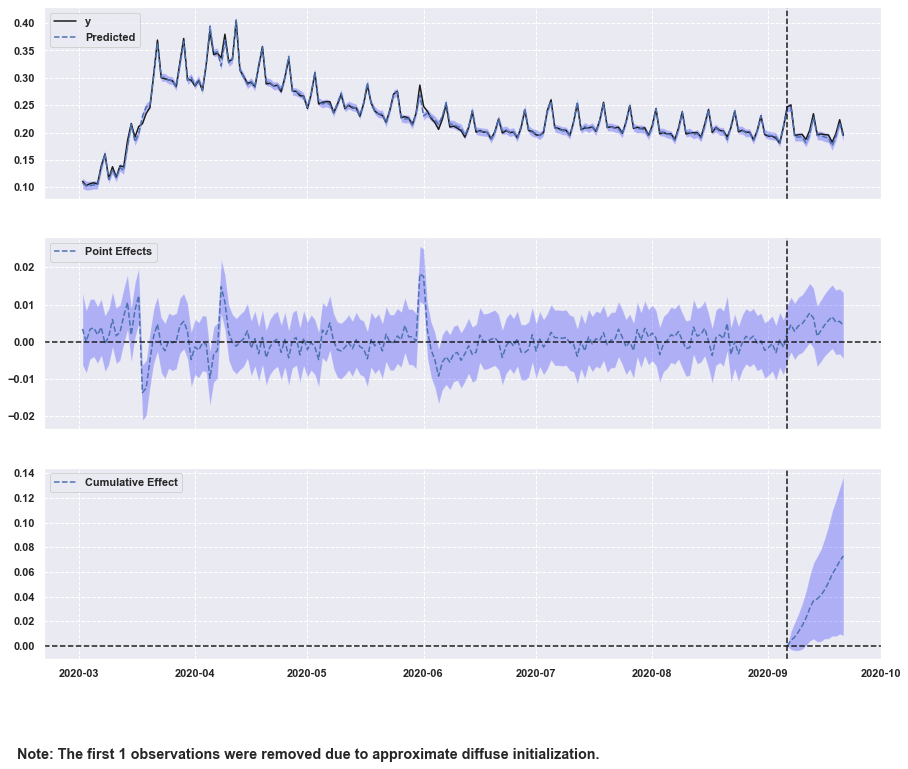

sigma2.irregular      0.004078
sigma2.level          0.000144
beta.El Dorado        0.001991
beta.Inyo            -0.012123
beta.Mariposa        -0.005246
beta.Del Norte       -0.010845
beta.Mono             0.009159
beta.Marin            0.037561
beta.Imperial         0.112962
beta.Sutter           0.029072
beta.Orange           0.854622
beta.Trinity          0.022583
beta.Shasta          -0.031976
beta.Amador           0.022473
beta.San Francisco   -0.030558
dtype: float64


In [121]:
df_causal= df_mov_cal_[df_mov_cal_["polygon_name"].isin(evac+unaffected_county)].pivot(index="ds",columns= "polygon_name",values="all_day_ratio_single_tile_users")

ax= df_causal.Mono.plot()
ax.show()

df_causal.Mono= df_causal.Mono.interpolate(method='time')
ax= df_causal.Mono.plot()
ax.show()

for i in dict_fire:
    print("====================================================================")
    print("Causal analysis for:{}".format(i))
   
    causal_analysis(df_causal,i,unaffected_county)
    

In [122]:
# Overall, it seems like the mobility data is not uncovering the changes?
# Would it be different if I use the time series itself, without the counter factual?
# Have one or two things about this and move on

In [ ]:
# On movement: Plumas county,affected by North complex fire from Aug 17th has a decrased movement from mid August 
# By observation, there seems to be a chance of signal in "stay put" measure in these evacuated counties
# TODO:Interesting observations: 
